# generate dataset

In [1]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification 
import numpy as np

In [12]:
X,Y = make_classification(n_classes=2, n_samples=400, n_clusters_per_class=1, random_state=3, n_features=2, n_informative=2, n_redundant = 0)

In [13]:
print(Y)

# convert our Y-labels into {1,-1}

Y[Y==0] = -1# brodcasting 
print(Y)

[0 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0
 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0
 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1
 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0
 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1
 1 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1
 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0
 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1
 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1
 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0
 1 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0]
[-1  1 -1  1 -1  1  1 -1 -1  1 -1  1  1 -1  1  1 -1 -1 -1  1  1  1  1 -1
 -1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1  1 -1 -1 -1
  1  1 -1 -1  1  1 -1  1 -1  1  1  1 -1  1

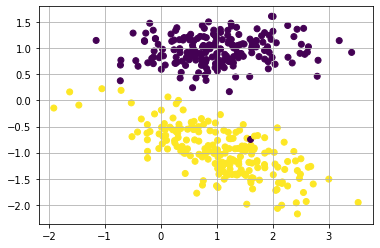

In [14]:
plt.grid(True)
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

In [15]:
class SVM:
    
    def __init__(self, C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
    
    def hingeLoss(self, W, b, X, Y):
        loss = 0.0
        
        loss += 0.5*np.dot(W,W.T)
        
        m = X.shape[0]
        
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            
            loss += self.C*max(0,(1-ti))
            
        return loss[0][0]
    
    def fit(self, X, Y, batch_size = 100, learning_rate = 0.001, maxItr = 300):
        
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate 
        c = self.C
        
        # init the model parameters
        W = np.zeros((1, no_of_features))
        bias = 0
        
        #print(self.hingeLoss(W,bias,X,Y))
        
        # Training from here..
        # weight and bias update rule we discussed in the last
        losses = []
        
        for i in range(maxItr):
            # tranning loop
            
            l = self.hingeLoss(W, bias, X, Y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            # Batch Gradinet Descent with random shuffling 
            for batch_start in range(0, no_of_samples, batch_size):
                # assume 0 gradient for the batch
                gradw = 0
                gradb = 0
                
                # iterate over all examples in the mini batch
                for j in range(batch_start, batch_start+batch_size):
                    if j < no_of_samples:
                        i = ids[j]
                        ti = Y[i]*(np.dot(W,X[i].T)+bias)

                        if ti > 1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                
                # gradient for the batch is ready! update W, B
                W = W - n*W + n*gradw 
                bias = bias + n*gradb
        
        self.W = W
        self.b = bias
        return W, bias, losses 

In [24]:
mySVM = SVM()
W, b, losses = mySVM.fit(X,Y, maxItr = 100)
print(losses[0])
print(losses[-1])

400.0
400.0
14.944995986393321


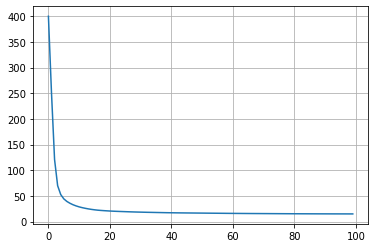

In [25]:
plt.grid(True)
plt.plot(losses)
plt.show()

In [26]:
W,B = mySVM.W, mySVM.b
(W,B)

(array([[-0.32391644, -2.03585019]]), 0.38500000000000023)

In [43]:
def plotHyperplane(w1, w2, b):
    plt.figure(figsize = (12,12))
    x_1 = np.linspace(-2, 4, 10)
    x_2 = -(w1*x_1+b)/w2  # w2 + B = 0
    
    plt.plot(x_1, x_2, color = 'green')
    
    plt.grid(True)
    plt.scatter(X[:,0], X[:,1], c=Y)
    plt.show()

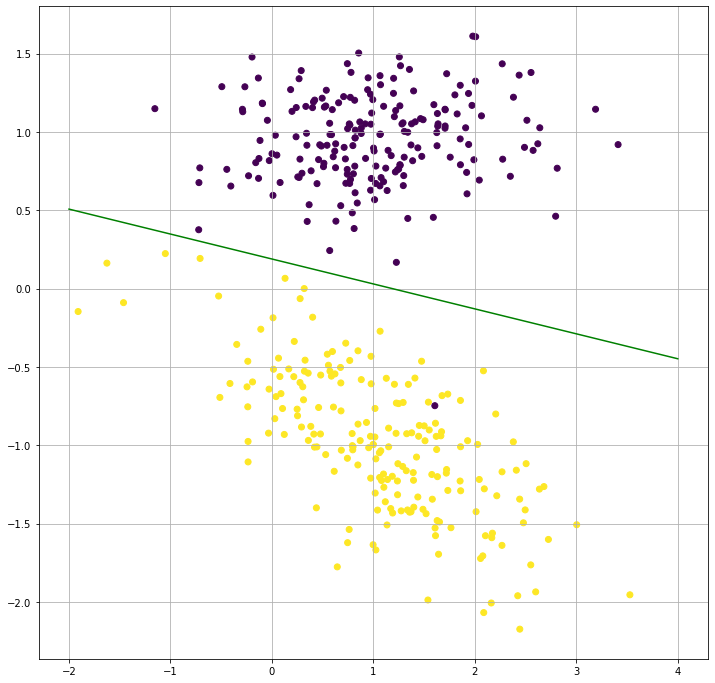

In [44]:
plotHyperplane(W[0,0],W[0,1],B)

In [ ]:
# effect the changing 

In [52]:
def plotHyperplane(w1, w2, b):
    plt.figure(figsize = (12,12))
    x_1 = np.linspace(-2, 4, 10)
    x_2 = -(w1*x_1+b)/w2  # w2 + B = 0
    
    x_p = -(w1*x_1+b+1)/w2  # w2 + B = -1
    x_n = -(w1*x_1+b-1)/w2  # w2 + B = 1
        
    plt.plot(x_1, x_2, color = 'green', label = 'Hyperplane WX+B=0')
    plt.plot(x_1, x_p, color = 'orange', label = '+ve Hyperplane WX+B=1')
    plt.plot(x_1, x_n, color = 'red', label = '-ve Hyperplane WX+B=-1')
    plt.legend()
    
    plt.grid(True)
    plt.scatter(X[:,0], X[:,1], c=Y)
    plt.show()

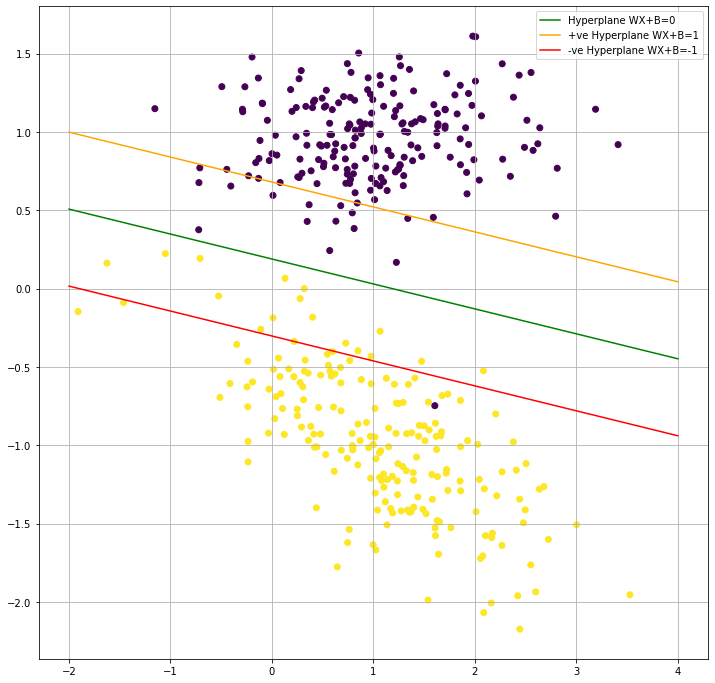

In [53]:
plotHyperplane(W[0,0],W[0,1],B)

In [54]:
mySVM = SVM(C=1000)
W, b, losses = mySVM.fit(X,Y, maxItr = 100)
print(losses[0])
print(losses[-1])

400000.0
400000.0
18603.10507926037


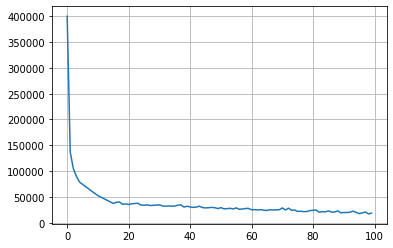

In [55]:
plt.grid(True)
plt.plot(losses)
plt.show()

In [56]:
W,B = mySVM.W, mySVM.b
(W,B)

(array([[-11.93136384, -37.22652382]]), 4.0)

# Visualising Support Vectors, Positive and Negative Hyperplanes

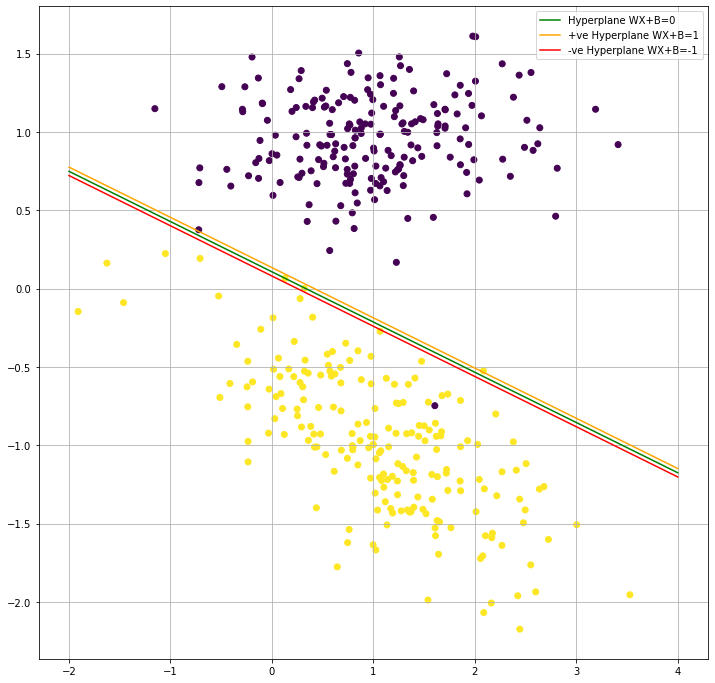

In [57]:
plotHyperplane(W[0,0],W[0,1],B)